# Homework 3 Solutions

In [4]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___
## Question 1

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**a.** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class.
___

In [2]:
# Functions to visualize LCG sequence on clock
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,u,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(u[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')

    # Plot the path of the LCG sequence
    for i in range(len(u)-1):
        theta_start = 2.0*np.pi*(u[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(u[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y,
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [3]:
# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def LCG(n,m = 2**31-1,a = 1103515245,c = 12345,x_0 = 1):
    u = np.zeros(n)
    x_n = np.zeros(n)

    x = x_0
    # x_n+1 = (ax_n+c) mod m
    for i in range(n):
        x_n[i] = x
        u[i] = (x+1.0)/(m+1.0) # normalize to be in [0,m/m+1]
        x = (a*x+c)%m

    return u, x_n

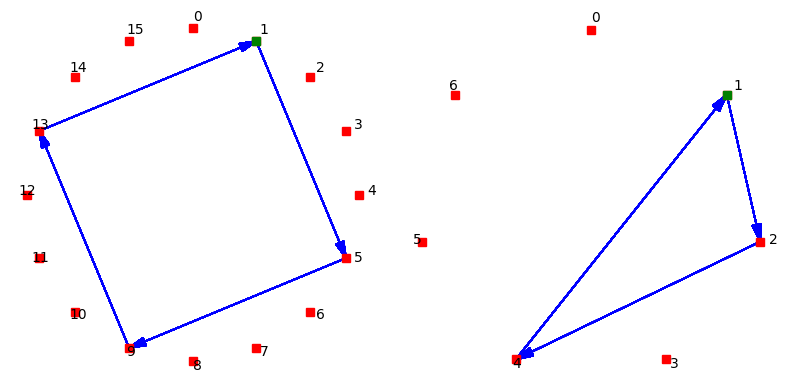

In [6]:
import matplotlib.gridspec as gridspec

x_0 = 1

fig = plt.figure()
fig.set_size_inches(w=15,h=15)

gridspec.GridSpec(6,6)
fig = plt.subplot2grid((6,6), (0,0), colspan=2, rowspan=2)
m_1 = 16
a_1 = 5
c_1 = 0
u, x = LCG(n = m_1**2 + 1, m = m_1, a = a_1, c = c_1, x_0 = x_0)
plot_clock_face(m_1,fig,annotate = True)
plot_clock_path(m_1,u,fig)
plt.axis('equal')
plt.axis('off')

fig = plt.subplot2grid((6,6), (0,2), colspan=2, rowspan=2)
m_2 = 7
a_2 = 2
c_2 = 0
v, y = LCG(n = m_1**2 + 1, m = m_2, a = a_2, c = c_2, x_0 = x_0)
plot_clock_face(m_2,fig,annotate = True)
plot_clock_path(m_2,v,fig)
plt.axis('equal')
plt.axis('off')

plt.show()

___
**b.** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization.
___

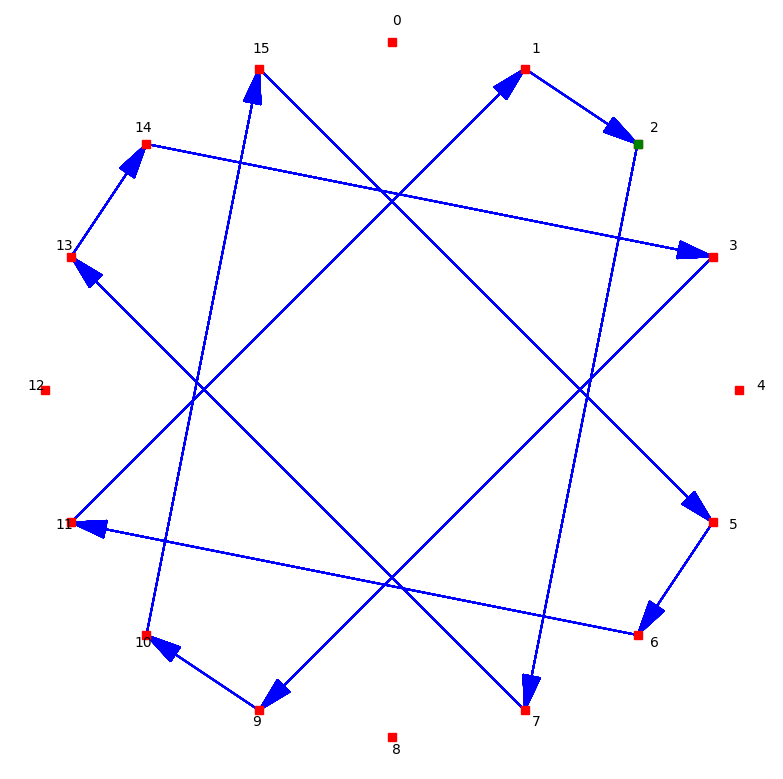

In [7]:
fig = plt.figure()
fig.set_size_inches(w=15,h=15)

fig = plt.subplot2grid((6,6), (2,0), colspan=4, rowspan=4)

m_3 = 16
z = (x+y)%m_3
w = (z+1.0)/(m_3+1.0) # normalize z

plot_clock_face(m_3,fig,annotate = True)
plot_clock_path(m_3,w,fig)
plt.axis('equal')
plt.axis('off');

___
**c.** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

The periods are:
* $x_n$ : 4

* $y_n$ : 3

* $z_n$ : 12

___
___
## Question 2:

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or \emph{pseudoinverse}:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


**a.** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$


### Ans.

When $y = 0$, and because $F(x) \ge 0$, then $F^{-1}(0)$ is $-\infty$. Now, when $0 \le y < 1/2$, because $F(x) = x$ for the same values of $x$, then this case also gives $F^{-1}(y) = y$. However, when $y$ falls in the range $(1/2,1)$, then $F^{-1}(y)$ must be 1 otherwise this won't be the infimum of the pseudoinverse. Hence, 

$$F^{-1}(y)=
	\begin{cases}
	-\infty & \mbox{for $y = 0$}\\
	y & \mbox{for $0 < y \le \frac{1}{2}$}, \\
	1 & \mbox{for $\frac{1}{2} < y \le 1$}
	 \end{cases}$$

___
**b.** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
___

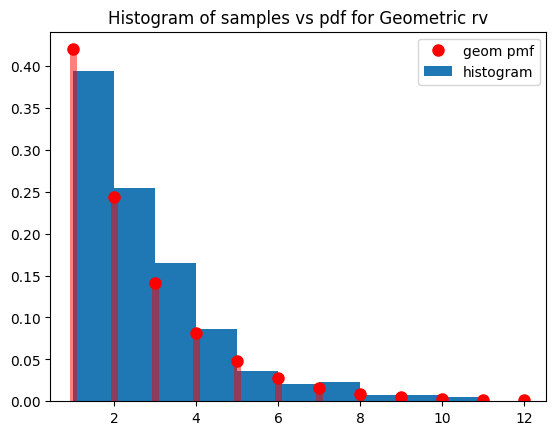

In [65]:
# Generate 1000 samples of X
n = 1000
p = 0.42

U = np.random.rand(n)
X = scipy.stats.geom.ppf(U,p)

#pdf points
x = np.arange(scipy.stats.geom.ppf(0.0001, p),
              scipy.stats.geom.ppf(0.999, p))
plt.plot(x, scipy.stats.geom.pmf(x, p), 'ro', ms=8, label='geom pmf')
plt.vlines(x, 0, scipy.stats.geom.pmf(x, p), colors='r', lw=5, alpha=0.5)

plt.hist(X,density=True,label="histogram",bins = x) # Plot histogram

plt.legend()
plt.title("Histogram of samples vs pdf for Geometric rv")
plt.show()

___
**c.** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
	 e^{x-2} & \mbox{for $0 \leq x \leq 2$}, \\
	e^{-x} & \mbox{for $x > 2$}, \\
	0 & \mbox{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.

___


### Ans

Consider the CDF of this given distribution, we have

$$F(x)=
	\begin{cases}
	e^{x-2} - e^{-2} & \mbox{for $0 \le x \le 2$}\\
	1 - e^{-x} & \mbox{for $x > 2$} 
	 \end{cases}$$
     
And,

$$F^{-1}(x)=
	\begin{cases}
	\log(xe^2 + 1) & \mbox{for $0 \le x \le 1 - e^{-2}$}\\
	-\log(1-x) & \mbox{for $x > 1 - e^{-2}$} 
	 \end{cases}$$

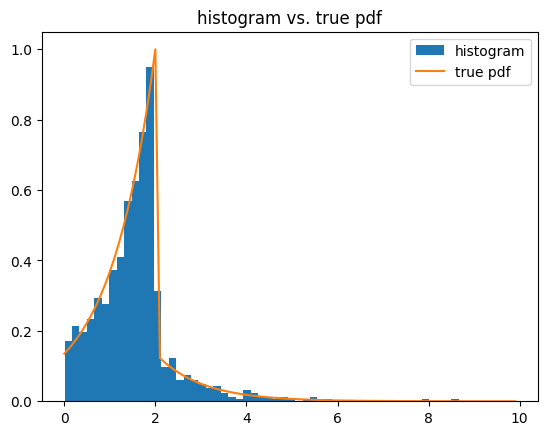

In [48]:
import numpy as np
import matplotlib.pyplot as plt
# Generate 1000 samples of X
n = 1000
X = []
for i in range(n):
    U = np.random.rand()
    if U < 1-np.exp(-2):
        X.append(np.log(U * np.exp(1)**2 + 1))
    else:
        X.append(-np.log(1-U))
plt.hist(X,density=True,bins='auto',label="histogram") # Plot histogram


#pdf points
x = np.arange(0, 10, 0.1)
fx = np.zeros(len(x))
c = np.exp(-2)
for i in range(len(x)):
    if x[i] <= 2:
        fx[i] = c*np.exp(x[i])
    else:
        fx[i] = c*np.exp(2-x[i])
plt.plot(x,fx,label="true pdf")
plt.legend()
plt.title("histogram vs. true pdf")
plt.show()

___
___
## Question 3:
Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**a.** Give an acceptance-rejection algorithm to generate samples of
	$X$.
___

### Ans.

First find an upper bound on f(x) by looking at the pdf.

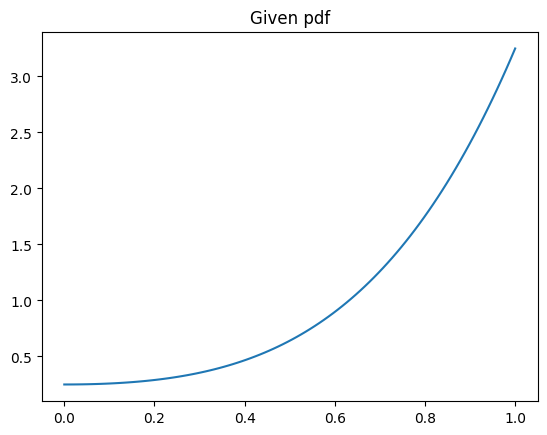

In [46]:
x = np.linspace(0,1,100)
fx = (1./4)*(5*x**4 + 4*x**3 + 3*x**2 + 1)
plt.plot(x,fx)
plt.title("Given pdf")
plt.show()

Its clear that the maximum is at $x=1$, and has value $13/4$

In order to generate samples, we first generate two uniform random variables $U, V$ and we will check whether $13/4 U \le f(V)$, if this holds then just return this $V$ as a sample. 

___
**b.** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.

Each sample needs $2\, U[0,1]$ samples, and is accepted with probability $4/13$. Thus, we need $2\times 13/4 = 6.5$ samples of $U[0,1]$ to generate one sample from our given pdf.

___
**c.** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___

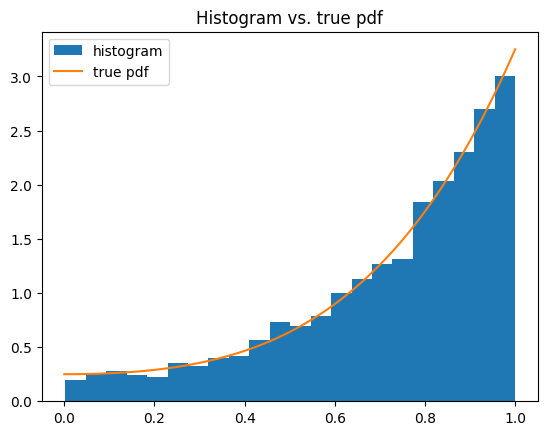

In [45]:
X = np.empty(2500)

i = 0
while i < 2500:
    U = np.random.rand()
    V = np.random.rand()
    if (13./4)*U <= (1./4)*(5*V**4 + 4*V**3 + 3*V**2 + 1):
        X[i] = V
        i = i + 1

plt.hist(X, density=True,bins='auto',label="histogram");
plt.plot(x, fx,label="true pdf")
plt.legend()
plt.title("Histogram vs. true pdf")
plt.show()

___
___
## Question 4:
We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___
**a.** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

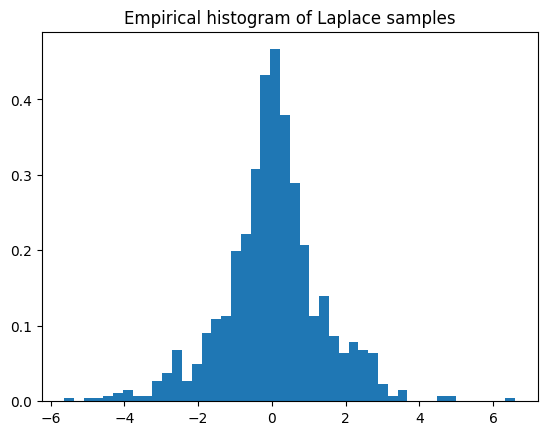

In [41]:
# Generate 1000 samples of X
n = 1000

U = np.random.rand(n)
X = scipy.stats.laplace.ppf(U)

plt.hist(X,density=True, bins = 'auto')
plt.title("Empirical histogram of Laplace samples")
plt.show()

___
**b.** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

From $kg(x) \ge f(x)$, we have that 

\begin{align*}
k & \ge \frac{f(x)}{g(x)} \\
& \ge \frac{e^{-x^2/2}/\sqrt{2\pi}}{e^{-|x|}/2} \\
& \ge \sqrt{\frac{2e}{\pi}}e^{-\frac{(|x| - 1)^2}{2}}
\end{align*}

for all $x$. The term $e^{-\frac{(|x| - 1)^2}{2}}$ is maximized at $x = 1$ which gives the value of $1$ since this is the normal distribution centering at 1 and it is reflected across Y-axis. Then, the smallest $k$ is $\sqrt{\frac{2e}{\pi}}$. We first generate $U$ with Laplace distribution with inverse transform method, and $V \sim Unif[0,kg(U)]$, and finally check whether $V \le f(U)$. If this holds, then return the value of $U$.

The expected number of samples needed will be similar to the case of the bounded support. Here, we will be generating a random variable $U$ with pdf $g$ (where we will use a uniform random number here to do it) and $V \sim Unif[0,kg(U)]$. We may consider $V$ as a scaled standard uniform distribution where $V = kg(U)V'$, and $V' \sim Unif[0,1]$. Then we have the probability of acceptance as 

\begin{align*}
P(V \le f(U)) & = P(V' \le \frac{f(U)}{kg(U)}) \\
& = \int P(V' \le \frac{f(u)}{kg(u)}| U = u)P(U = u) du\\
& = \int \frac{f(u)}{kg(u)}g(u) du \\
& = \int \frac{f(u)}{k} du \\
& = \frac{1}{k}
\end{align*}

where the number of samples needed is still following geometric distribution. Because we need 2 uniforms for each sample/time, then the mean number of saample is $2k$, or $2\sqrt{\frac{2e}{\pi}}$.

In [5]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
np.sqrt(np.e * 2/np.pi)

1.315489246958914

### Ans.


___
**c.** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

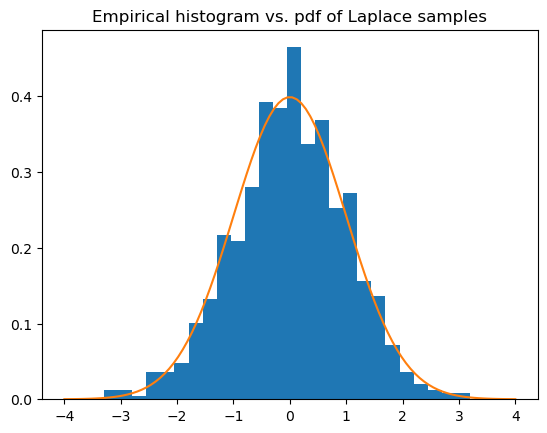


 Mean numer of samples needed: 1.336, with 95% CI:  (2.5888870295640283, 2.755112970435972)


In [11]:
k = np.sqrt(2/np.pi)*np.exp(1/2)

X = np.empty(1000)

n = 1000

count = 1
c = []
i = 0
while i < 1000:
    U = np.random.rand()
    Z_1 = scipy.stats.laplace.ppf(U)
    Z_2 = np.random.rand()*k*scipy.stats.laplace.pdf(Z_1)
    if Z_2 <= scipy.stats.norm.pdf(Z_1):
        X[i] = Z_1
        i = i + 1
        c.append(2*count)
        count = 1
    else:
        count = count + 1

plt.hist(X,density=True, bins = 'auto')
plt.title("Empirical histogram vs. pdf of Laplace samples")

#plot the true pdf
x = np.linspace(-4,4,100)
fx = scipy.stats.norm.pdf(x)

plt.plot(x, fx);

#CI for the number of samples needed
mean = np.mean(c)
var = np.var(c, ddof=1)
z = scipy.stats.norm.ppf(0.975)
LB = mean - z*np.sqrt(var/n)
UB = mean + z*np.sqrt(var/n)
plt.show()


print("\n Mean numer of samples needed: {}, with 95% CI:  {}".format(mean/2, (LB, UB)))

___
**d.** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

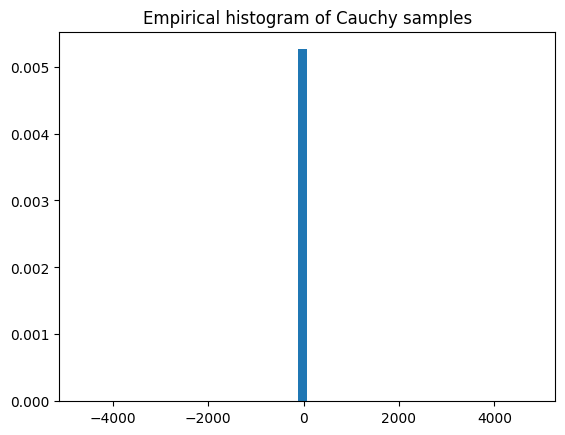

In [40]:
# Generate 1000 samples of X
n = 1000

U = np.random.rand(n)
X = scipy.stats.cauchy.ppf(U)

plt.hist(X,density=True, bins = 50)
plt.title("Empirical histogram of Cauchy samples")
plt.show()

___
**e.** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

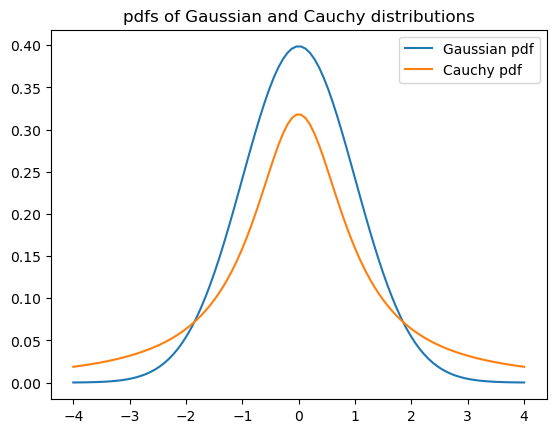


 Expected numer of samples needed: 3.040693802132562


In [5]:
#plot the true pdf
x = np.linspace(-4,4,100)
fx = scipy.stats.norm.pdf(x)
gx = scipy.stats.cauchy.pdf(x)
plt.plot(x, fx,label="Gaussian pdf")
plt.plot(x, gx,label="Cauchy pdf")
plt.legend()
plt.title("pdfs of Gaussian and Cauchy distributions")


#compute k
x = np.arange(-3,3,0.01)
f = scipy.stats.norm.pdf(x)
g = scipy.stats.cauchy.pdf(x)
k = max(f/g)
#k = scipy.stats.norm.pdf(1)/scipy.stats.cauchy.pdf(1)


plt.show()

print("\n Expected numer of samples needed: {}".format(2*k))

In [11]:
k, 2* np.e**(-0.5) * np.pi/(np.sqrt(2 * np.pi)), np.sqrt(2 * np.pi/np.e), np.pi/(np.sqrt(2 * np.pi))

(1.520346901066281, 1.520346901066281, 1.520346901066281, 1.2533141373155003)

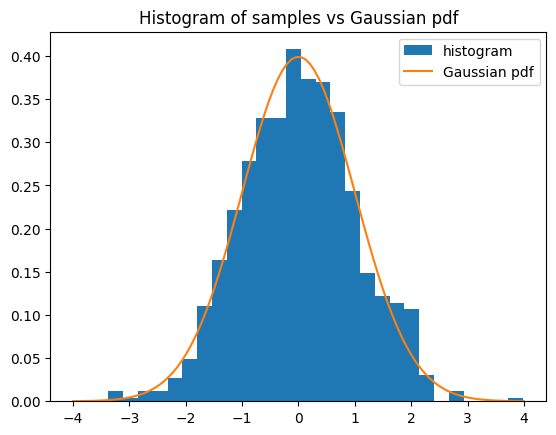


 Mean numer of samples needed: 3.122, with 95% CI:  (3.0087205847481577, 3.235279415251842)


In [38]:
X = np.empty(1000)

count = 1
c = []
i = 0
while i < 1000:
    U = np.random.rand()
    Z_1 = scipy.stats.laplace.ppf(U)
    #Z_1 = scipy.stats.laplace.rvs()
    Z_2 = np.random.rand()*k*scipy.stats.laplace.pdf(Z_1)
    if Z_2 <= scipy.stats.norm.pdf(Z_1):
        X[i] = Z_1
        i = i + 1
        c.append(2*count)
        count = 1
    else:
      count = count + 1

plt.hist(X, density=True, bins = 'auto',label="histogram");

#plot the true pdf
x = np.linspace(-4,4,100)
fx = scipy.stats.norm.pdf(x)

plt.plot(x, fx,label="Gaussian pdf")

#CI for the number of samples needed
mean = np.mean(c)
var = np.var(c, ddof=1)
z = scipy.stats.norm.ppf(0.975)
LB = mean - z*np.sqrt(var/n)
UB = mean + z*np.sqrt(var/n)

plt.legend()
plt.title("Histogram of samples vs Gaussian pdf")
plt.show()

print("\n Mean numer of samples needed: {}, with 95% CI:  {}".format(mean, (LB, UB)))

In [9]:
1/np.sqrt(2 * np.pi)

0.3989422804014327